In [21]:
from typing import List

class Solution:
    # O(NlogN + N**(k-1)) O(N)
    def __init__(self) -> None:
        self.nums = None
    
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:
        self.nums = nums
        self.nums.sort()

        self.res = []

        self.NSum(0, len(self.nums)-1, 4, target, [])

        return self.res
    

    def NSum(self, left, right, N, target, cur):
        print(left, right, N, target, cur)
        if left >= right or N < 2:
            return
        
        # two sum
        if N == 2:
            l, r = left, right

            while l < r:
                if self.nums[l] + self.nums[r] < target:
                    l += 1

                elif self.nums[l] + self.nums[r] > target:
                    r -= 1

                else:

                    while l < r and self.nums[r] == self.nums[r-1]:
                        r -= 1
                    while l < r and self.nums[l] == self.nums[l+1]:
                        l += 1

                    self.res.append(cur + [self.nums[l], self.nums[r]])
                    l += 1
                    r -= 1
        
        else:
            for i in range(left, right-N+2):
                if i > left and self.nums[i] == self.nums[i-1]:
                    continue

                if self.nums[i] * N > target or self.nums[-1] * N < target:
                    return

                self.NSum(i+1, right, N-1, target-self.nums[i], cur+[self.nums[i]])
        
        return

nums = [0,0,0,0]
target = 0
Solution().fourSum(nums=nums, target=target)
        

0 3 4 0 []
1 3 3 0 [0]
2 3 2 0 [0, 0]


[[0, 0, 0, 0]]

#### Linear Regression

epoch 1000 loss 9234.980142256094
epoch 2000 loss 6426.573252413571
epoch 3000 loss 6013.740258301931
epoch 4000 loss 5925.2996822187115
epoch 5000 loss 5881.226722782385
epoch 6000 loss 5843.654334213503
epoch 7000 loss 5807.454436407674
epoch 8000 loss 5771.925284982226
epoch 9000 loss 5736.9637082472245
epoch 10000 loss 5702.5476054944775
{'w': array([[ 114.58559161],
       [-217.14539574],
       [ 580.24667243],
       [ 341.653207  ],
       [-119.84038723],
       [-184.97057829],
       [-244.01366964],
       [ 126.74070522],
       [ 407.11468638],
       [ 193.83113316]]), 'b': 151478.08920870037}



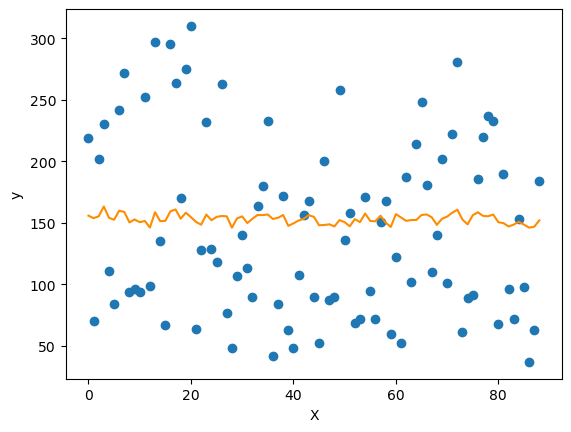

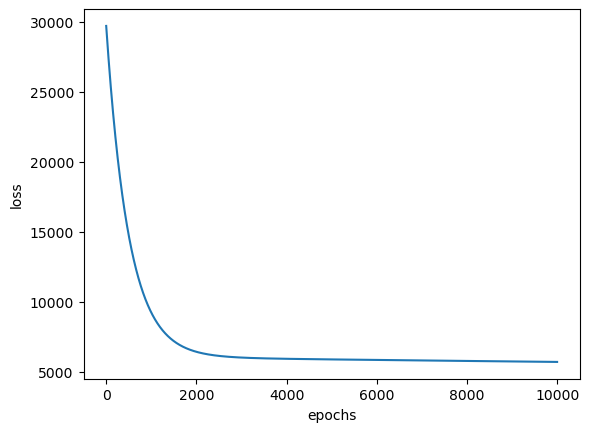

In [36]:
import numpy as np

def linear_loss(X, y, w, b):
    """loss function

    Args:
        X: num_train * num_feature
        y: num_train * 1
        w: num_feature * 1
        b: 1
    """
    
    num_feature = X.shape[1]
    num_train = X.shape[0]
    
    y_hat = np.dot(X, w) + b # Y_hat = X * w + b
    loss = np.sum((y_hat - y) ** 2) / num_train
    
    dw = np.dot(X.T, (y_hat - y)) / num_train # df/dw = X.T(y_hat - y)
    db = np.sum(y_hat - y) / num_train # df/db = y_hat - y
    
    return y_hat, loss, dw, db


def initialize_paras(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b


def train(X, y, lr, epochs):
    loss_list = []
    w, b = initialize_paras(X.shape[1])
    
    for i in range(1, epochs+1):
        y_hat, loss, dw, db = linear_loss(X_train, y_train, w, b)
        loss_list.append(loss)
        # gradient decent
        w += -lr * dw
        b += -lr * db
        
        if i % 1000 == 0:
            print('epoch {} loss {}'.format(i, loss))
    
        params = {
            'w': w,            
            'b': b
        }
        
        grads = {
            'dw': dw,            
            'db': db
        }
    return loss_list, params, grads


def predict(X, paras):
    y_hat = np.dot(X, paras['w']) + paras['b']
    return y_hat


# testing
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


# training
loss_list, params, grads = train(X_train, y_train, 0.001, 10000)
print(paras)

# testing
y_hat = predict(X_test, params)
print()

# visualization
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

plt.plot(loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [31]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes

class lr_model():    
    def __init__(self):        
        pass

    def prepare_data(self):
        data = load_diabetes().data
        target = load_diabetes().target
        X, y = shuffle(data, target, random_state=42)
        X = X.astype(np.float32)
        y = y.reshape((-1, 1))
        data = np.concatenate((X, y), axis=1)        
        return data   
         
    def initialize_params(self, dims):
        w = np.zeros((dims, 1))
        b = 0
        return w, b    
    
    def linear_loss(self, X, y, w, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        y_hat = np.dot(X, w) + b
        loss = np.sum((y_hat-y)**2) / num_train
        dw = np.dot(X.T, (y_hat - y)) / num_train
        db = np.sum((y_hat - y)) / num_train        
        return y_hat, loss, dw, db    
    
    def linear_train(self, X, y, learning_rate, epochs):
        w, b = self.initialize_params(X.shape[1])        
        for i in range(1, epochs):
            y_hat, loss, dw, db = self.linear_loss(X, y, w, b)
            w += -learning_rate * dw
            b += -learning_rate * db            
            if i % 10000 == 0:
                print('epoch %d loss %f' % (i, loss))
            
            params = {                
                'w': w,                
                'b': b
            }
            grads = {                
                'dw': dw,                
                'db': db
            }        
        return loss, params, grads    
    
    def predict(self, X, params):
        w = params['w']
        b = params['b']
        y_pred = np.dot(X, w) + b        
        return y_pred    
        
    def linear_cross_validation(self, data, k, randomize=True):        
        if randomize:
            data = list(data)
            shuffle(data)

        slices = [data[i::k] for i in range(k)]        
        for i in range(k):
            validation = slices[i]
            train = [data                        
            for s in slices if s is not validation for data in s]
            train = np.array(train)
            validation = np.array(validation)            
            yield train, validation
            
            
if __name__ == '__main__':
    lr = lr_model()
    data = lr.prepare_data()   
 
    for train, validation in lr.linear_cross_validation(data, 5):
        X_train = train[:, :10]
        y_train = train[:, -1].reshape((-1, 1))
        X_valid = validation[:, :10]
        y_valid = validation[:, -1].reshape((-1, 1))

        loss5 = []
        loss, params, grads = lr.linear_train(X_train, y_train, 0.001, 100000)
        loss5.append(loss)
        score = np.mean(loss5)
        print('five kold cross validation score is', score)
        y_pred = lr.predict(X_valid, params)
        valid_score = np.sum(((y_pred - y_valid) ** 2)) / len(X_valid)
        print('valid score is', valid_score)

epoch 10000 loss 5611.704502
epoch 20000 loss 5258.726277
epoch 30000 loss 4960.271811
epoch 40000 loss 4707.234957
epoch 50000 loss 4492.067734
epoch 60000 loss 4308.511724
epoch 70000 loss 4151.375892
epoch 80000 loss 4016.352800
epoch 90000 loss 3899.866551
five kold cross validation score is 3798.9563843996484
valid score is 4214.092765494475
epoch 10000 loss 5421.168404
epoch 20000 loss 5106.640864
epoch 30000 loss 4838.968257
epoch 40000 loss 4610.442887
epoch 50000 loss 4414.661874
epoch 60000 loss 4246.304449
epoch 70000 loss 4100.947379
epoch 80000 loss 3974.911961
epoch 90000 loss 3865.137182
five kold cross validation score is 3769.083546495626
valid score is 4615.051403980545
epoch 10000 loss 5586.652342
epoch 20000 loss 5295.082496
epoch 30000 loss 5044.857033
epoch 40000 loss 4829.540681
epoch 50000 loss 4643.729724
epoch 60000 loss 4482.885115
epoch 70000 loss 4343.192699
epoch 80000 loss 4221.446108
epoch 90000 loss 4114.948637
five kold cross validation score is 4021.4

### Logistic Regression

In [2]:
import numpy as np

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

def initialize_params(dims):
     w = np.zeros((dims, 1))
     b = 0
     
     return w, b

def logistic_loss(X, y, w, b):
     num_train = X.shape[0]
     num_feature = X.shape[1]
     
     y_hat = sigmoid(np.dot(X, w) + b)
     cost = -1 / num_train * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
     dw = np.dot(X.T, (y_hat - y)) / num_train
     db = np.sum(y_hat - y) / num_train
     # cost = np.squeeze(cost)
     return y_hat, cost, dw, db

def train(X, y, lr, epochs):
     w, b = initialize_params(X.shape[1])
     losses = []
     
     for i in range(1, epochs+1):
          y_hat, cost, dw, db = logistic_loss(X, y, w, b)
          losses.append(cost)
          w -= lr * dw
          b -= lr * db
          
          if i % 1000 == 0:
               print('Epoch: {}, loss: {}'.format(i, cost))
     
     params = {
          'w': w,
          'b': b,
     }
     grads = {
          'dw': dw,
          'db': db
     }
     
     return losses, params, grads

def predict(X, params):
     y_hat = sigmoid(np.dot(X, params['w']) + params['b'])
     y_predict = np.where(y_hat > 0.5, 1, 0)
     
     return y_predict


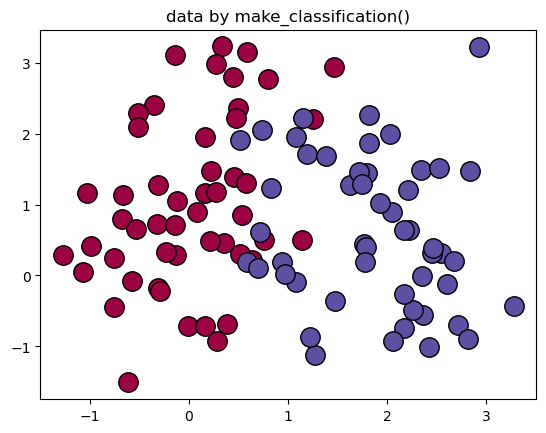

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,labels=make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)

unique_lables=set(labels)
colors=plt.cm.Spectral(np.linspace(0, 1, len(unique_lables)))
for k, col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:, 0], x_k[:, 1], 'o', markerfacecolor=col, markeredgecolor="k",
             markersize=14)
plt.title('data by make_classification()')
plt.show()

In [4]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [5]:
cost_list, params, grads = train(X_train, y_train, 0.01, 1000)
y_prediction = predict(X_test, params)
print(y_prediction)

Epoch: 1000, loss: 0.3122412091932765
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [6]:
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(min(len(y_test), len(y_prediction))):
        if int(y_test[i]) == int(y_pred[i]):
            correct_count += 1

    accuracy_score = correct_count / len(y_test)    
    return accuracy_score
    
# 打印准确率
accuracy_score_train = accuracy(y_train, predict(X_train, params))
print(accuracy_score_train)

0.1


In [4]:
class Node:
    def __init__(self, val=-1, next=None) -> None:
        self.val = val
        self.next = next
        
vals = [1, 2, 4, 5]

head = Node(vals[0])
ptr = head

for val in vals[1:]:
    n = Node(val)
    ptr.next = n
    ptr = ptr.next

ptr = head

while ptr:
    print(ptr.val)
    ptr = ptr.next
    
ptr = head
ins = 7

# 1 -> 2 -> 4 -> 5

while ptr and ptr.val < ins:
    pre = ptr
    ptr = ptr.next

n = Node(ins)
pre.next = n
n.next = ptr

ptr = head

while ptr:
    print(ptr.val)
    ptr = ptr.next

1
2
4
5
1
2
4
5
7
